# Desarrollo PCA analysis

Autor: FFJP

In [406]:
#Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import os
import janitor

os.getcwd()

'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Github/R/Desarrollo_local/Scripts'

## Get and pre process data

In [407]:
#Data
fundesa_file = r'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Github/R/Desarrollo_local/Data/datos_fundesa.csv'
raw_data = pd.read_csv(fundesa_file, encoding='latin1')
raw_data = raw_data.clean_names()
print(raw_data.columns)


Index(['cod_depto', 'departamento', 'cod_mupio', 'municipio',
       'extorsiones_por_100_000_habitantes',
       'homicidios_por_100_000_habitantes', 'faltas_por_100_000_habitantes',
       'casos_por_conflictividad', 'ranking_gestion_municipal', 'pdm_ot',
       'brecha_de_la_red_vial_', 'distancia_promedio_a_aeropuertos',
       'distancia_promedio_a_puertos', 'tasa_de_electrificacion_',
       'cobertura_de_agua_y_saneamiento', 'deficit_de_vivienda',
       'radiobases_de_telefonia_celular_por_km2', 'usuarios_de_internet',
       'tasa_de_inflacion', 'pobreza', 'gini', 'gasto_en_salud_publica',
       'tasa_de_desnutricion_cronica', 'gasto_en_educacion', 'tasa_neta',
       'alumnos_por_docente', 'capacitacion_tecnica',
       'graduandos_mate_lectura', 'carga_tributaria', 'inversion_publica',
       'afiliacion_al_igss', 'afiliados_por_patrono_particular',
       'peso_del_gobierno_en_la_contratacion', 'salario_minimo',
       'ingreso_medio', 'deportados', 'km2_a_cargo_de_cada_ag

Create variables divide by population

Select variables that we will use

In [408]:
seguridad = ['extorsiones_por_100_000_habitantes','homicidios_por_100_000_habitantes', 'faltas_por_100_000_habitantes']
salud = ['afiliacion_al_igss', 'tasa_de_desnutricion_cronica']
instituciones = ['ranking_gestion_municipal', 'gasto_en_salud_publica', 'gasto_en_educacion', 'carga_tributaria', 'inversion_publica']
infraestructura = ['distancia_promedio_a_aeropuertos', 'distancia_promedio_a_puertos', 'tasa_de_electrificacion_',
                   'cobertura_de_agua_y_saneamiento', 'deficit_de_vivienda','radiobases_de_telefonia_celular_por_km2', 'usuarios_de_internet', 
                   'densidad_poblacional'] #,'extension_territorial'] #'brecha_de_la_red_vial_', #extensino territorial es interesante pero es un rank
macroeconomia = ['pobreza', 'ingreso_medio', 'pib_per_capita'] #'pib_local','tasa_de_inflacion'
capital_humano = ['alumnos_por_docente', 'capacitacion_tecnica', 'graduandos_mate_lectura', ]
sectores = ['peso_del_gobierno_en_la_contratacion', 'fuerza_laboral_sector_servicios_', 'agricultura','salario_minimo']
migracion = ['deportados', 'remesas', 'migra_vida_pout']
financiero = ['depositos', 'cartera_de_creditos']
emprendimiento = ['costo_iniciar_un_negocio_']
demos = ['ladinos_porcentaje', 'establecimientos_turisticos', 'turismo_pp','tasa_global_de_participacion', 'tasa_global_de_participacion_indigena',
       'tasa_global_de_participacion_mujeres', 'educ', 'indigena_educ', 'mujeres_educ_mean'] 

#skiped tiempo de iniciar un negocio y bancarios because they were equal in all municipios

icl_agregados = ['instituciones', 'infraestructura', 'adopcion_de_tics', 'entorno_economico', 'salud', 'fuerza_laboral_y_talento',
                 'inversion_productiva', 'mercado_laboral', 'sistema_financiero','tamano_del_mercado', 'dinamismo_de_los_negocios', 'capacidad_de_innovacion']
sofi = ['wes_score_mean']
development_vars = seguridad + instituciones + infraestructura
development_vars = icl_agregados 
#development_vars = icl_agregados + sofi
development_vars = seguridad + salud + instituciones + infraestructura + macroeconomia + capital_humano + sectores +migracion + financiero + emprendimiento +demos
development_vars = icl_agregados 


data_pd = raw_data[development_vars]

data_pd

,instituciones,infraestructura,adopcion_de_tics,entorno_economico,salud,fuerza_laboral_y_talento,inversion_productiva,mercado_laboral,sistema_financiero,tamano_del_mercado,dinamismo_de_los_negocios,capacidad_de_innovacion
0,69.329933,83.316112,92.521270,82.754538,100.000000,69.047151,48.138724,82.845554,83.589875,72.408772,97.962154,100
1,58.902298,80.534437,97.416648,84.559296,51.240588,54.709094,98.548473,75.300888,88.853333,45.636783,71.924389,0
2,52.396234,81.051956,50.624164,74.620446,51.193072,53.034175,83.256068,72.024004,98.516430,38.782250,66.097996,0
3,64.992051,81.455511,35.716515,70.670674,60.162501,58.594952,100.000000,69.575066,98.516430,16.797205,62.405612,0
4,69.633073,75.683740,33.296367,58.577999,51.647056,46.413569,95.761306,69.065009,98.516430,18.203084,62.005412,0
...,...,...,...,...,...,...,...,...,...,...,...,...
335,73.507409,58.764530,10.625571,58.501435,30.987403,28.896430,48.110043,46.918559,91.165224,27.388247,46.119428,0
336,67.927743,63.023809,17.075624,65.078568,46.477522,38.608369,43.731812,46.341246,81.732825,26.530971,57.115725,0
337,78.140154,63.543183,13.860381,65.083731,52.463398,45.080520,54.631078,48.654240,78.792251,39.087604,60.486054,0
338,63.295949,72.077231,42.964444,73.251478,53.919795,41.346269,56.691019,46.593880,85.279322,26.379598,54.274490,0


Check for missing values

In [409]:
print(data_pd.isna().sum().sort_values(ascending=False))
data_pd = data_pd.dropna(axis=1)
data = data_pd.values  # Convert to a NumPy array and filter
development_vars = data_pd.columns

instituciones                0
infraestructura              0
adopcion_de_tics             0
entorno_economico            0
salud                        0
fuerza_laboral_y_talento     0
inversion_productiva         0
mercado_laboral              0
sistema_financiero           0
tamano_del_mercado           0
dinamismo_de_los_negocios    0
capacidad_de_innovacion      0
dtype: int64


### Visualizations

View patterns in variables

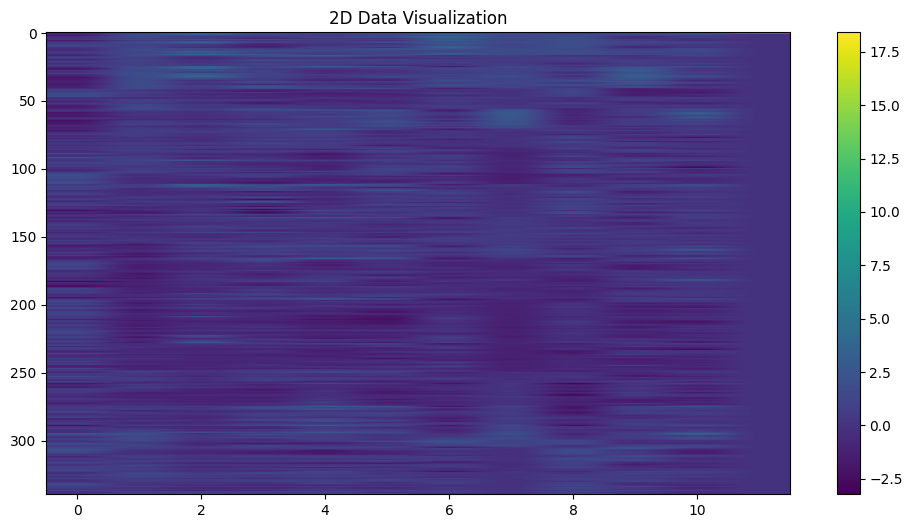

In [410]:
zDatap = stats.zscore(data)


plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Display the data as an image
plt.imshow(zDatap, cmap='viridis', aspect='auto')
#plt.imshow(data, cmap='viridis', aspect='auto')
plt.colorbar()  # Add a color bar to show the color scale
plt.title('2D Data Visualization')
plt.show()

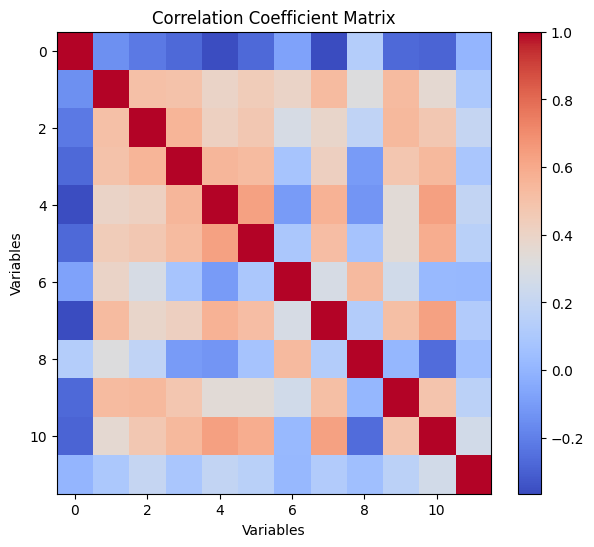

In [411]:
plt.figure(figsize=(7, 6))  # Adjust the width and height as needed
#r = np.corrcoef(zDatap, rowvar=False)  # Variables are columnwise
r = np.corrcoef(data, rowvar=False)  # Variables are columnwise

# Plot the correlation matrix
plt.imshow(r, cmap='coolwarm', aspect='auto')  # Using 'coolwarm' colormap
plt.colorbar()  # Add color bar to show the correlation scale
plt.title('Correlation Coefficient Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [412]:
data_pd.iloc[:,28:34].head(10)
#data[0:10:,28:34]

""
0
1
2
3
4
5
6
7
8
9


## PCA analysis

Run the PCA

In [413]:
# The PCA expects normally distributed DATA
# So that is why we z-score the data first
# 1. Z-score the data:
zDatap = stats.zscore(data)
# 2. Run the PCA:
pcap = PCA().fit(zDatap)
# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pcap.explained_variance_

# 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. Where do the
# principal components point, in terms of the 54 questions?
loadings = pcap.components_

# 3c. Rotated Data: Simply the transformed data - we had 360 municipios (rows) in
# terms of x variables (columns), now we have 360 particpants in terms of x
# factors ordered by decreasing eigenvalue
rotatedData = pcap.fit_transform(zDatap)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# (co)variance explained:
covarExplained = eigVals/sum(eigVals)*100

Determine the number of factors (principal components) to interpret

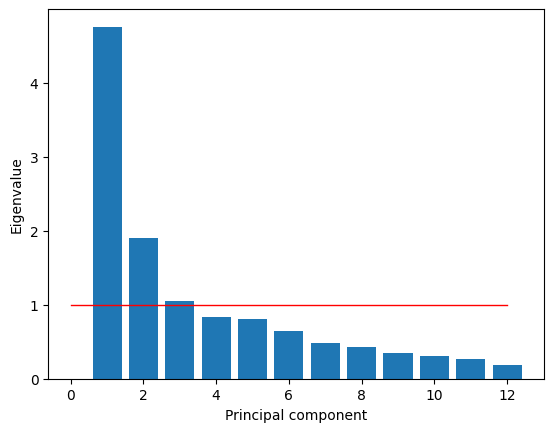

In [414]:
acumvar = np.cumsum(covarExplained)
# What a scree plot is: Plotting a bar graph of the sorted Eigenvalues
numClasses = len(data[0,:])
plt.bar(np.linspace(1,numClasses,numClasses),eigVals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1)# Kaiser criterion line
plt.show()

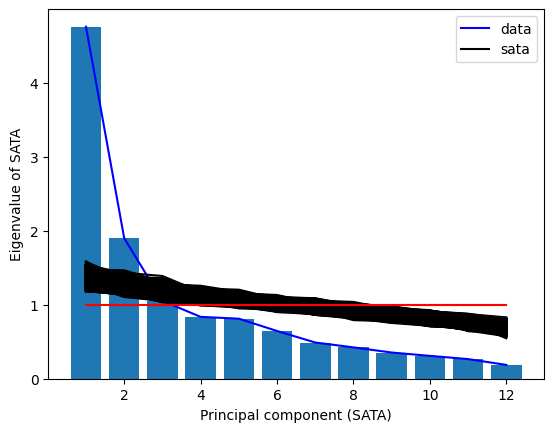

In [415]:
#%% 6 Horn's parallel method (Horn, 1965) as described on page 239ff of the NDS book

# Initialize variables:
nDraws = 10000 # How many repetitions per resampling?
numRows = len(data) #968 How many rows to recreate the dimensionality of the original data?
numColumns = len(data[0,:]) #54 How many columns to recreate the dimensionality of the original data?
eigSata = np.empty([nDraws,numColumns]) # Initialize array to keep eigenvalues of sata
eigSata[:] = np.NaN # Convert to NaN

for i in range(nDraws):
    # Draw the sata from a normal distribution:
    sata = np.random.normal(0,1,[numRows,numColumns]) 
    # Run the PCA on the sata:
    pca = PCA()
    pca.fit(sata)
    # Keep the eigenvalues:
    temp = pca.explained_variance_
    eigSata[i] = temp

# After 10,000 times we get 10,000 random pca's each with x eigen values

# Make a plot of that and superimpose the real data on top of the sata:
plt.bar(np.linspace(1,numClasses,numClasses),eigVals)
plt.plot(np.linspace(1,numColumns,numColumns),eigVals,color='blue') # plot eigVals from section 4
plt.plot(np.linspace(1,numColumns,numColumns),np.transpose(eigSata),color='black') # plot eigSata
plt.plot([1,numColumns],[1,1],color='red') # Kaiser criterion line
plt.xlabel('Principal component (SATA)')
plt.ylabel('Eigenvalue of SATA')
plt.legend(['data','sata'])
plt.show()

# By this method, only the first x factors exceed the noise
# distribution.

In [447]:
#Ooptimal nuber of factors
optimal_factors = 2
print('Covariance explained by the ' + str(optimal_factors) + ' principal factors:', sum(covarExplained[:optimal_factors]))

Covariance explained by the 2 principal factors: 55.34083941878716


In [448]:
covarExplained[:7]

array([39.54858303, 15.79225639,  8.750829  ,  6.94860463,  6.74474972,
        5.36156486,  4.06705839])

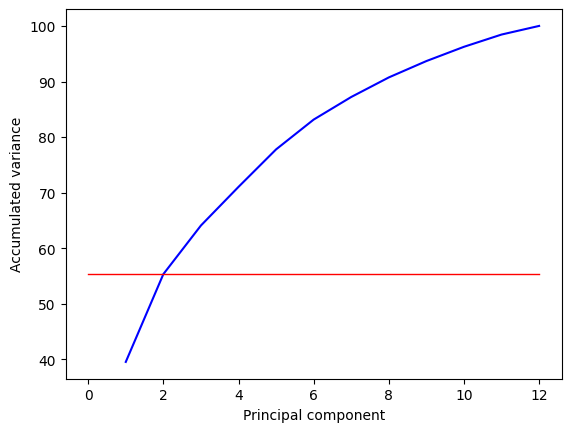

In [449]:
var = np.sum(covarExplained[0:2])
var
#Variance plot
plt.plot(np.linspace(1,numClasses,numClasses), acumvar, color = 'blue') #Acumulated variance
plt.xlabel('Principal component')
plt.ylabel('Accumulated variance')
plt.plot([0,numClasses],[var,var],color='red',linewidth=1)# Kaiser criterion line
plt.show()

## Interpreting the factors

In [419]:
#7 Interpreting the factors 
# Now that we realize that 1to 8 are reasonable solutions to the personality questions
# we have to interpret the factors.
# This is perhaps where researchers have the most leeway.
# You do this - in principle - by looking at the loadings - in which
# direction does the factor point? 

#Because the sum of the squares of all loadings for an individual principal component 
#must sum to one, we can calculate what the loadings would be if all variables contributed 
#equally to that principal component. Any variable that has a larger loading than this value 
#contributes more than one variable’s worth of information and would be regarded as an 
#important contributor to that principal component.
#54*(loadings[i]**2)=1 loadings[i] = ± 0.13608276348795434
tres = (1/len(loadings[0,:]))**0.5


#whichPrincipalComponent = 1 # Try a few possibilities (at least 1,2,3 - or 0,1,2 that is - indexing from 0)

# 1: The first one accounts for almost everything, so it will probably point 
# in all directions at once
# 2: Challenging/informative - how much information?
# 3: Organization/clarity: Pointing to 6 and 5, and away from 16 - structure?

def loadingplot(loadings, data, factors, threshold, names = [None]*1000):
    totalfactors = len(data[0,:])
    for ii in range(factors):
        plt.bar(np.linspace(1,totalfactors,totalfactors),loadings[ii,:])
        plt.xlabel('Question')
        plt.ylabel('Loading')
        plt.title('Factor {:.0f}: '.format(ii+1) + names[ii])
        plt.plot([1,totalfactors],[threshold,threshold],color='red')
        plt.plot([1,totalfactors],[-threshold,-threshold],color='red')
        plt.show()

#loadingplot(loadings, data, optimal_factors,tres, ['','','','','','','',''])

In [450]:
factor_names = None

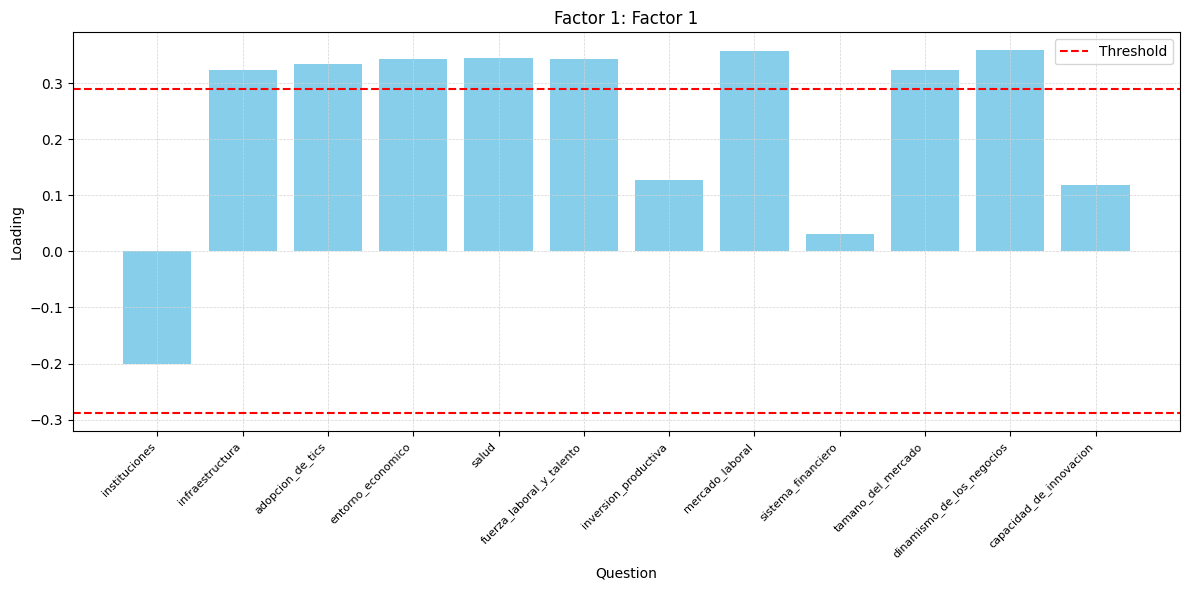

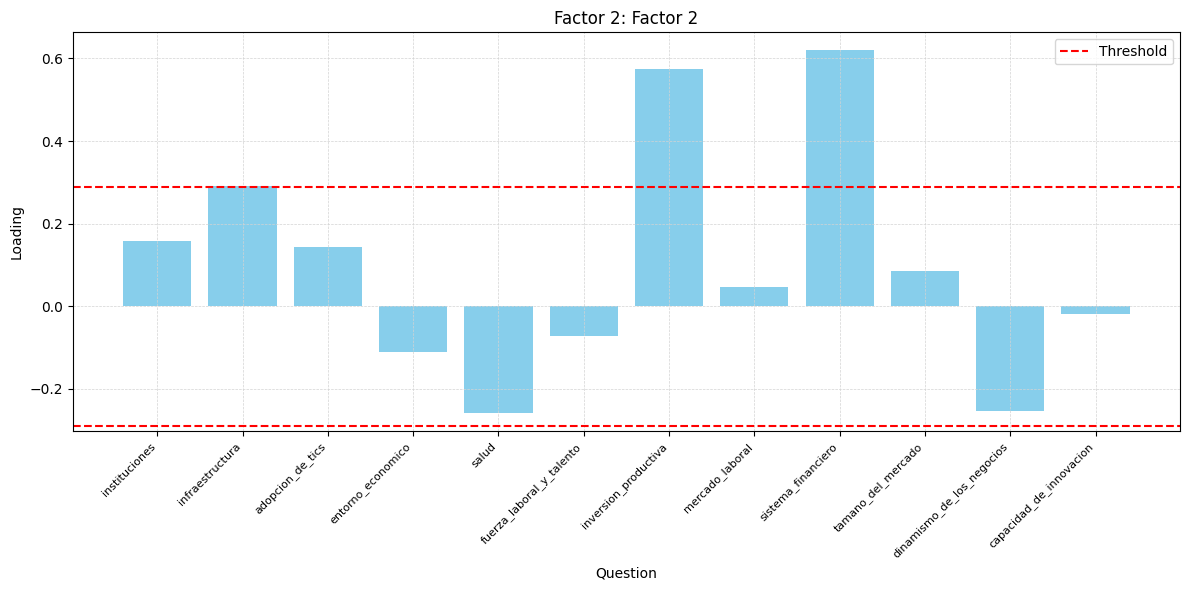

In [451]:


def loadingplot(loadings, data, factors, threshold, names=None, question_labels=None):
    """
    Plots the loadings for a specified number of factors with variable names on the x-axis.

    Parameters:
    - loadings: 2D array-like, shape (factors, variables)
        Factor loadings for each factor.
    - data: 2D array-like
        The data used to calculate the factor loadings.
    - factors: int
        Number of factors to plot.
    - names: list, optional
        Names for each factor (length should be at least `factors`).
    - question_labels: list, optional
        Labels for each question (length should match the number of variables).
    - threshold: float, optional
        Threshold for marking loadings on the plot (default is 0.2).
    """
    totalfactors = loadings.shape[1]  # Number of variables (columns) in loadings
    if names is None:
        names = ['Factor {}'.format(i + 1) for i in range(factors)]
    
    if question_labels is None:
        question_labels = [f'Question {i + 1}' for i in range(totalfactors)]

    for ii in range(factors):
        plt.figure(figsize=(12, 6))  # Set the figure size for each plot
        plt.bar(np.arange(1, totalfactors + 1), loadings[ii, :], color='skyblue')  # Bar plot
        plt.xlabel('Question')
        plt.ylabel('Loading')
        plt.title('Factor {:.0f}: {}'.format(ii + 1, names[ii]))
        
        # Threshold lines
        plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
        plt.axhline(-threshold, color='red', linestyle='--')
        plt.legend()
        
        # Set x-ticks to question labels
        plt.xticks(np.arange(1, totalfactors + 1), question_labels, rotation=45, ha='right', fontsize=8)

        plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray', zorder=1)  # Lower zorder for the grid
        #plt.ylim(-1, 1)  # Set y-axis limits for better visualization
        plt.grid(axis='y', linestyle='--')  # Add gridlines for better readability
        plt.tight_layout()  # Adjust layout for better fit
        plt.show()


loadingplot(loadings, data, optimal_factors, threshold=tres, names = factor_names,question_labels=development_vars)

In [452]:
factor_names = ['capital humano, infraestructura y macroeconomia', 'inversion productiva y sistema financiero']
#factor_names = ['','','','','','','']

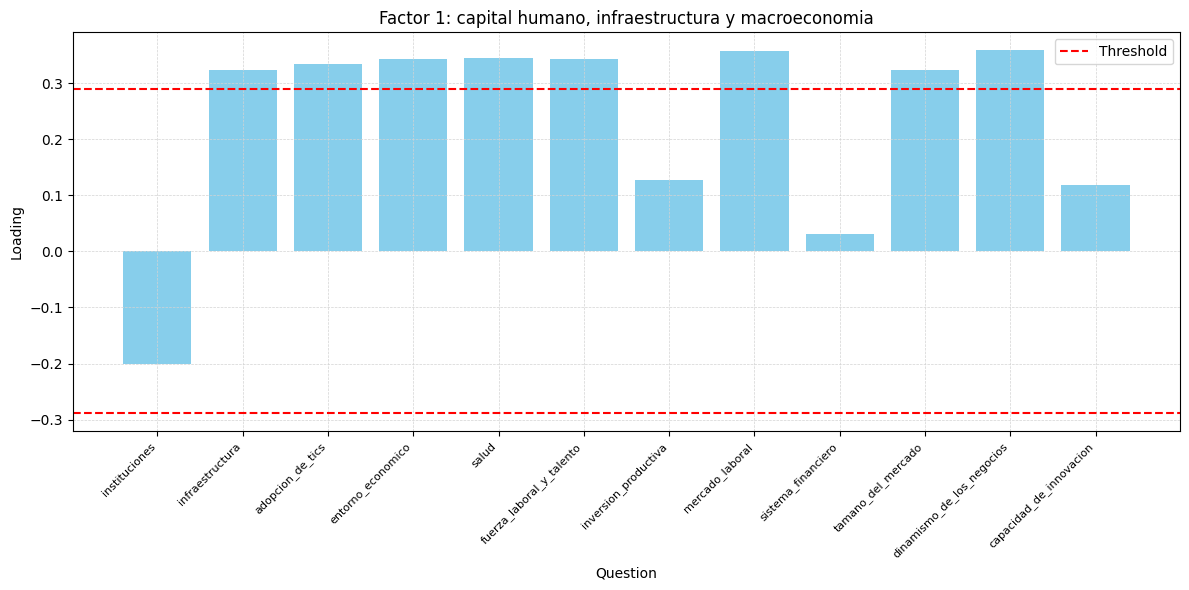

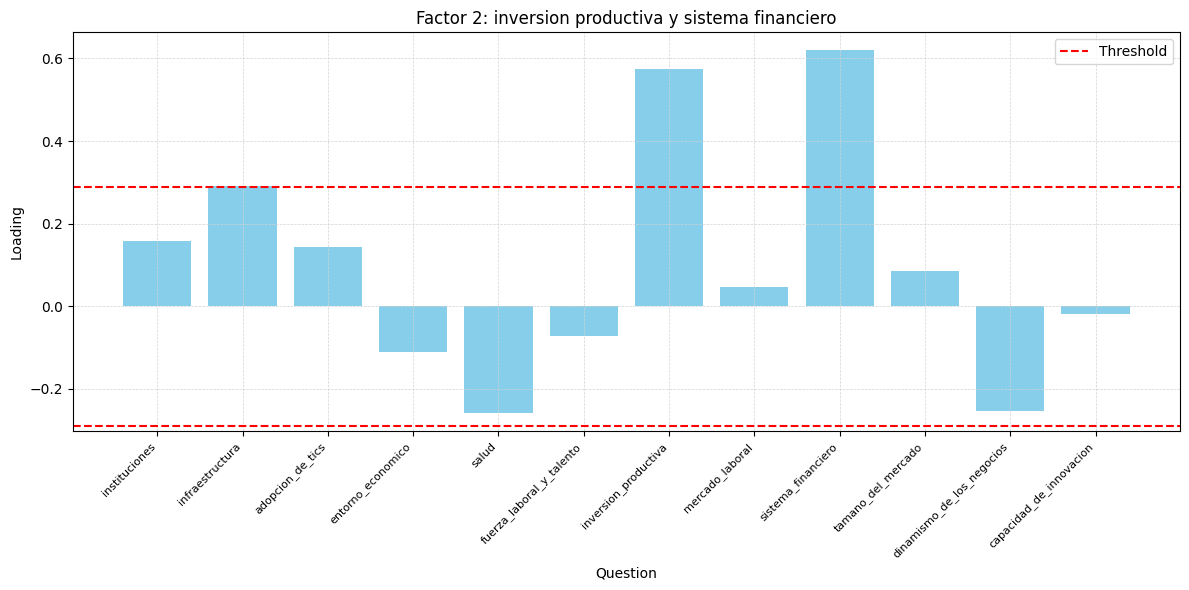

In [453]:
loadingplot(loadings, data, 2, threshold=tres, names = factor_names,question_labels=development_vars)

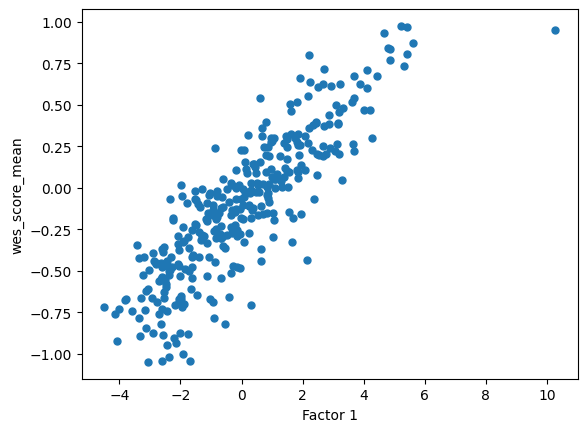

In [454]:
#Plot the data from columns 421-474 in the new coordinate system, where each dot 
#represents a person, and the axes represent the factors you found in 1). Hint: 
#If you identified more than 2 meaningful factors, it is a good idea to create 
#several 2D (X vs. Y) subplots for better interpretability.

#plt.plot(rotatedData[:,0]*-1,rotatedData[:,1]*-1,'o',markersize=5)
plt.plot(rotatedData[:,0]*1,raw_data['wes_score_mean'].values,'o',markersize=5)
plt.xlabel('Factor 1')#factor_names[ 0])
plt.ylabel('wes_score_mean')
#plt.ylabel(factor_names[1])

def factorplot(rotatedData, factors, names = [None]*1000):
    for ii in range(factors):
        for jj in range(factors-ii-1):
            plt.plot(rotatedData[:,ii],rotatedData[:,ii+jj+1],'o',markersize=5)
            plt.xlabel(names[ii])
            plt.ylabel(names[ii+jj+1]) 
            plt.show()

#factorplot(rotatedData, 2, [])
            #plt.plot()
#factorplot(rotatedData, optimal_factors)

In [455]:
rotatedData.shape


(340, 12)

# Analisis de clusters

#Identify clusters in this new space. Use a method of your choice (e.g. kMeans,
# DBScan, hierarchical clustering) to do so. Determine the optimal number of clusters
# and identify which cluster a given user is part of.

In [456]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [457]:
# Store our transformed data - the predictors - as X:
X = np.transpose(np.array([rotatedData[:,0], rotatedData[:,1],
                           rotatedData[:,2], rotatedData[:,3],
                           rotatedData[:,4], rotatedData[:,5],
                           rotatedData[:,6]]))#, rotatedData[:,7]]))
print(X.shape)

# Silhouette: How similar to points in cluster vs. others, arbitrariness

# Init:
numClusters = 11 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN

# Compute kMeans:
for ii in range(2,numClusters + 2): # Loop through each cluster (from 2 to 10!)
    print(ii)
    kMeans = KMeans(n_clusters = int(ii)).fit(X) # compute kmeans
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(X,cId) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
    Q[ii-2] = sum(s) # take sum
    # Plot data:
    #plt.subplot(3,3,ii-1) 
#    plt.hist(s,bins=20) 
#    plt.xlim(-0.2,1)
#    plt.ylim(0,500)
#    plt.xlabel('Silhouette score')
#    plt.ylabel('Count')
#    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
#    plt.show()

(340, 7)
2
3
4
5
6
7
8
9
10
11
12


In [458]:
#Q
np.linspace(2,10,numClusters)

array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ])

In [459]:
numClusters

11

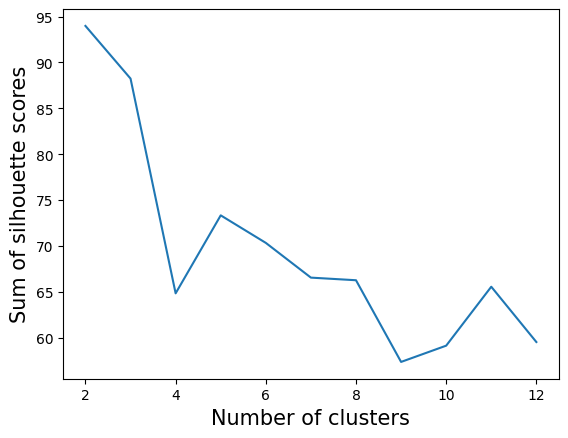

In [460]:
#%% Plot this to make it clearer what is going on
plt.plot(np.linspace(2,12,numClusters),Q)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Sum of silhouette scores', fontsize = 15)
plt.show()
# kMeans gives you the center coordinates of the clusters, assuming a number
# of clusters. Silhouette gives you how many are most unamigously described
# by the clusters. Most likely "real" number: Where the sum of the
# silhouette scores peaks. In reality, they are complementary. Use together

2 seems to be the optimal number of clusters

In [464]:
selected_clusters = 5
kMeans = KMeans(n_clusters = int(selected_clusters)).fit(X) # compute kmeans
cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
s = silhouette_samples(X,cId)


Graficas entre variabes independientes

In [462]:
indexVector

array([1., 2., 3.])

TypeError: 'Axes' object is not subscriptable

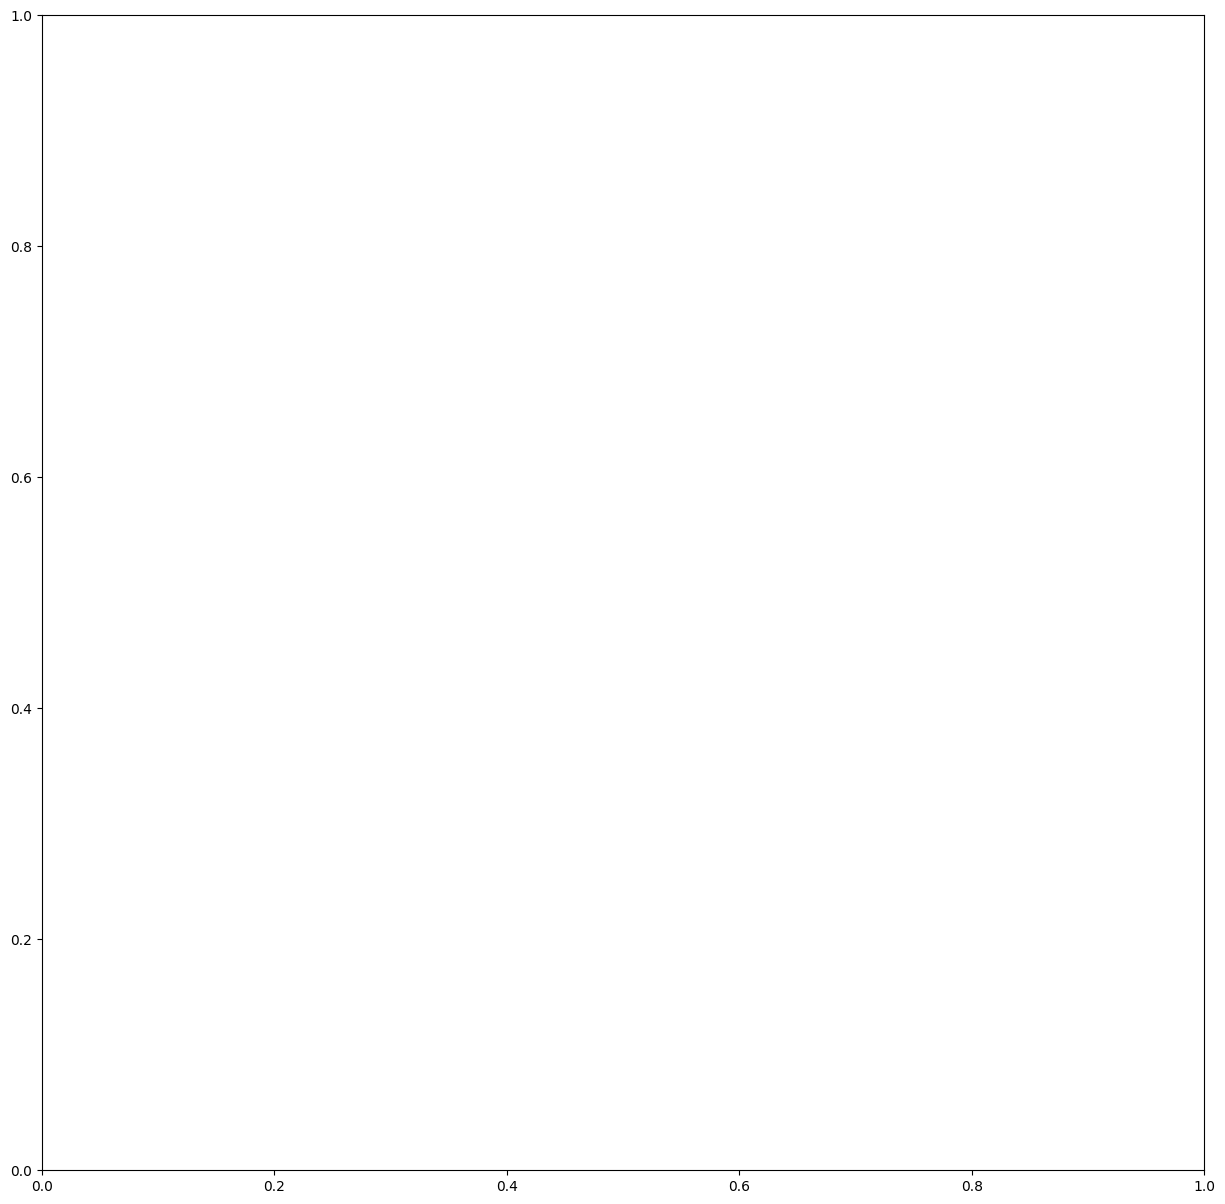

In [465]:
import numpy as np
import matplotlib.pyplot as plt

def plot_factors_subplots(rotatedData, cCoords, cId, factor_names, optimal_factors, highlight_cluster):
    """
    Plots pairwise scatter plots of the rotated data and cluster centers in a grid of subplots.

    Parameters:
    - rotatedData: 2D array-like, shape (samples, factors)
        The rotated data points.
    - cCoords: 2D array-like, shape (clusters, factors)
        The coordinates of the cluster centers.
    - cId: array-like
        Array of cluster IDs for each sample.
    - factor_names: list of str
        Names of the factors for labeling the axes.
    - optimal_factors: int
        Number of factors to plot.
    """
    # Define the number of subplots (n x n grid)
    fig, axes = plt.subplots(nrows=optimal_factors - 1, ncols=optimal_factors - 1, figsize=(15, 15))
    
    indexVector = np.linspace(1, len(np.unique(cId)), len(np.unique(cId)))
    alphas = np.array([0.3] * len(np.unique(cId)))
    for cluster in highlight_cluster:
        alphas[cluster] = 1

    # Iterate through rows and columns of the subplot grid
    for jj in range(optimal_factors - 1):
        for gg in range(optimal_factors - jj - 1):
            ax = axes[jj, jj + gg]  # Select the corresponding subplot

            # Iterate over the clusters to plot data points
            for ii in indexVector:
                plotIndex = np.argwhere(cId == int(ii - 1))
                ax.plot(rotatedData[plotIndex, jj], rotatedData[plotIndex, jj + 1 + gg], 'o', markersize=1, alpha = alphas[int(ii-1)])
                ax.plot(cCoords[int(ii - 1), jj], cCoords[int(ii - 1), jj + gg + 1], 'o', markersize=4, color='black', alpha = 0.5)  

            # Set labels for each subplot
            ax.set_xlabel(factor_names[jj])
            ax.set_ylabel(factor_names[jj + gg + 1])

            # Add a grid for better readability
            ax.grid(True, linestyle='--', linewidth=0.5, color='lightgray')

    # Adjust layout to avoid overlap and improve spacing
    plt.tight_layout()
    plt.show()

plot_factors_subplots(rotatedData, cCoords, cId, factor_names, optimal_factors, [0,1])


In [466]:
np.linspace(1, len(np.unique(cId)), len(np.unique(cId)))

array([1., 2., 3., 4., 5.])

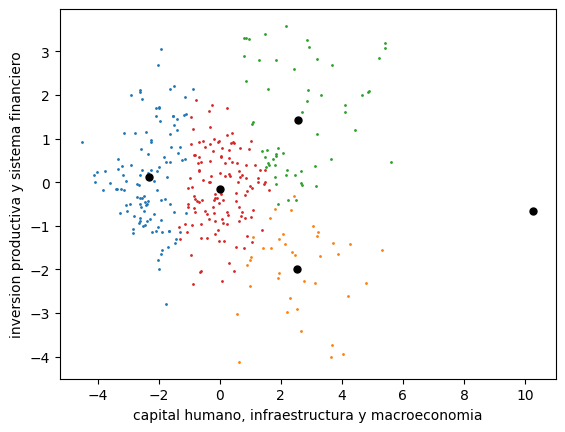

In [467]:
#%% Now let's plot and color code the data
indexVector = np.linspace(1,len(np.unique(cId)),len(np.unique(cId))) 
for jj in range(optimal_factors-1):
    for gg in range(optimal_factors-jj-1):
        for ii in indexVector:
            plotIndex = np.argwhere(cId == int(ii-1))
            plt.plot(rotatedData[plotIndex,jj],rotatedData[plotIndex,jj+1+gg],'o',markersize=1)
            plt.plot(cCoords[int(ii-1),jj],cCoords[int(ii-1),jj+gg+1],'o',markersize=5,color='black')  
            plt.xlabel(factor_names[jj])#, fontsize = 15)
            plt.ylabel(factor_names[jj+gg+1])#, fontsize = 15)
            #plt.xticks(fontsize=10)
            #plt.yticks(fontsize=10)
        plt.show()

Graficas entre variables dependientes

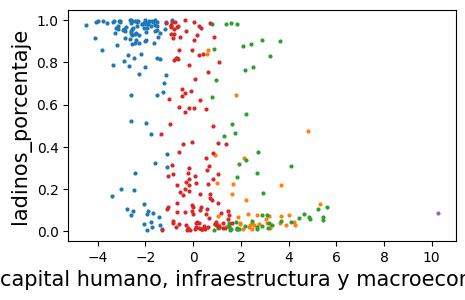

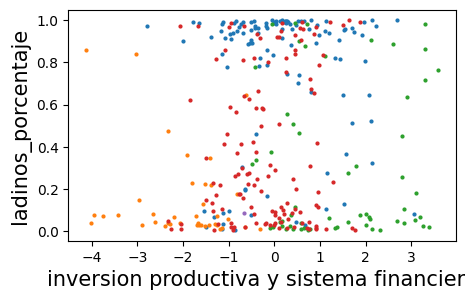

In [480]:
y_var = 'ladinos_porcentaje'


#%% Now let's plot and color code the data
indexVector = np.linspace(1,len(np.unique(cId)),len(np.unique(cId))) 
for jj in range(1):
    for gg in range(optimal_factors-jj):
        plt.figure(figsize=(5, 3))
        #print(gg)
        for ii in indexVector:
            plotIndex = np.argwhere(cId == int(ii-1))
            plt.plot(rotatedData[plotIndex,gg],raw_data[y_var].values[plotIndex],'o',markersize=2)
            #plt.plot(cCoords[int(ii-1),jj],cCoords[int(ii-1),jj+gg+1],'o',markersize=5,color='black')  
            plt.xlabel(factor_names[gg], fontsize = 15)
            plt.ylabel(y_var, fontsize = 15)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
        plt.show()


In [437]:
#Save csv
np.savetxt('clusters.csv', cId, delimiter=',', fmt='%d')

np.savetxt('my_array.csv', rotatedData, delimiter=',', fmt='%f')


In [483]:
new_data = raw_data
new_data['factor_1_fundesa'] = rotatedData[:,0]
new_data['factor_2_fundesa'] = rotatedData[:,1]
new_data['clusters_num'] = cId
cluster_order = ['0', '1', '2', '3', '4', '5']
# Convert the clusters column to a categorical type with the specified order
new_data['clusters'] = pd.Categorical(new_data['clusters_num'].astype(str), categories=cluster_order, ordered=True)
#new_data['clusters'] = new_data['clusters_num'].astype(str)

new_data.to_csv(r'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Github/R/Desarrollo_local/Data/base_update_fabian.csv', index=False)


## Maps


In [471]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [472]:
#Read shape file

geo_file = r'/Users/fabianjp/Documents/Work/ASIES/Desarrollo local/Data/Mapas/Shapefiles_raw/municipios_gtm/municipios_GTM.shp'
municipios = gpd.read_file(geo_file)
municipios.head(10)

,OBJECTID,Codigo,Municipio,OID_1,OID_12,Color,Cod_Dep,Departamen,SHAPE_Leng,SHAPE_Area,AreaKm2,MDTAs,geometry
0,1,2000,Belice,1,1,0,23,Belice,0.0,0.0,21700.271606,None,"POLYGON ((721465.215 1820138.647, 721503.320 1..."
1,2,1711,Melchor de Mencos,2,2,0,17,Petén,0.0,0.0,2105.748045,None,"POLYGON ((642145.073 1860256.995, 639242.493 1..."
2,3,1701,Flores,3,3,0,17,Petén,0.0,0.0,3865.325014,None,"POLYGON ((624257.203 1881987.396, 623914.488 1..."
3,4,1702,San José,4,4,0,17,Petén,0.0,0.0,2086.042802,None,"POLYGON ((564453.955 1876460.149, 564365.376 1..."
4,5,1704,San Andrés,5,5,0,17,Petén,0.0,0.0,8051.841963,None,"POLYGON ((564453.955 1876460.149, 564451.609 1..."
5,6,1705,La Libertad,6,6,0,17,Petén,0.0,0.0,6752.846772,None,"POLYGON ((533747.508 1892013.374, 533753.049 1..."
6,7,1703,San Benito,7,7,0,17,Petén,0.0,0.0,544.916464,None,"POLYGON ((562802.162 1873391.368, 563021.024 1..."
7,8,1707,Santa Ana,8,8,0,17,Petén,0.0,0.0,1539.740495,None,"POLYGON ((624562.855 1871594.020, 624492.526 1..."
8,9,1708,Dolores,9,9,0,17,Petén,0.0,0.0,2495.702448,None,"POLYGON ((642145.073 1860256.995, 642106.357 1..."
9,10,1706,San Francisco,10,10,0,17,Petén,0.0,0.0,1902.481586,None,"POLYGON ((564259.940 1869491.859, 566667.595 1..."


/var/folders/9_/cw4fcnqx19j5csppmhlz4mzm0000gn/T/ipykernel_65731/3025324879.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', 10)  # 6 distinct colors for clusters 0 to 5
/var/folders/9_/cw4fcnqx19j5csppmhlz4mzm0000gn/T/ipykernel_65731/3025324879.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Clusters')  # Show legend with a title
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


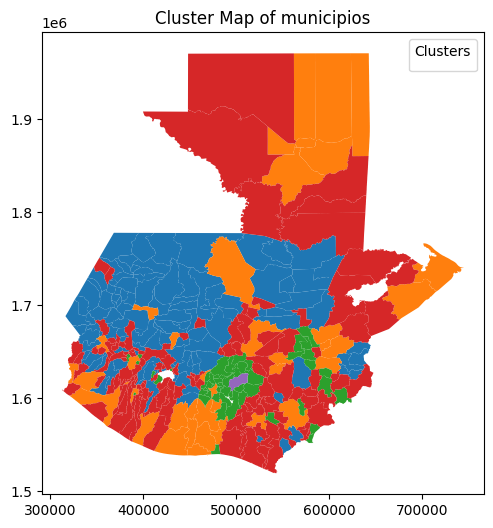

In [473]:
# Read a shapefile of the counties
import matplotlib.colors as mcolors
import matplotlib.cm as cm


# Merge the shapefile GeoDataFrame with the new_data DataFrame on a common key
merged = municipios.merge(new_data, left_on='Codigo', right_on='cod_mupio')

# Plot the merged GeoDataFrame
cmap = mcolors.ListedColormap(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

cmap = cm.get_cmap('tab10', 10)  # 6 distinct colors for clusters 0 to 5

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(selected_clusters):
    cluster_data = merged[merged['clusters_num'] == i]
    #cluster_data.plot(ax=ax, column = 'clusters', color=colors[i], label=f'Cluster {i}')  # Add label for legend
    cluster_data.plot(ax=ax, color=cmap(i), label=f'Cluster {i}')  # Use color from the colormap


#merged.plot(column='clusters', ax=ax, legend=True, cmap='tab10')
plt.title('Cluster Map of municipios')
plt.legend(title='Clusters')  # Show legend with a title

plt.show()


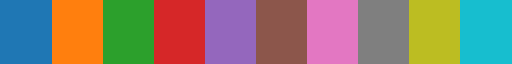

In [442]:
cmap

In [443]:
cluster_data

,OBJECTID,Codigo,Municipio,OID_1,OID_12,Color,Cod_Dep,Departamen,SHAPE_Leng,SHAPE_Area,...,indicador_504_inversion_anual_en_capital_fijo_por_habitante_cod,indicador_505_inversion_anual_en_capital_fijo_con_recursos_percibidos_por_ingresos_propios,indicador_505_inversion_anual_en_capital_fijo_con_recursos_percibidos_por_ingresos_propios_cod,indicador_506_inversion_anual_en_capital_fijo_con_recursos_percibidos_por_transferencias_del_gobierno_central_,indicador_506_inversion_anual_en_capital_fijo_con_recursos_percibidos_por_transferencias_del_gobierno_central_cod,no_corr,factor_1,factor_2,clusters_num,clusters
72,74,1904,Gualán,75,75,0,19,Zacapa,0.0,0.0,...,Bajo,0.0027,Bajo,0.0320,Bajo,347.0,1.328515,0.277575,2,2
85,87,1903,Río Hondo,88,88,0,19,Zacapa,0.0,0.0,...,Bajo,0.1839,Bajo,0.1921,Bajo,350.0,2.445048,-0.312334,2,2
89,91,1905,Teculután,92,92,0,19,Zacapa,0.0,0.0,...,Bajo,0.0300,Bajo,0.0048,Bajo,352.0,3.147039,-0.084768,2,2
96,98,1507,San Jerónimo,99,99,0,15,Baja Verapaz,0.0,0.0,...,Bajo,0.0553,Bajo,0.1962,Bajo,21.0,0.695164,-0.782020,2,2
99,101,202,Morazán,102,102,0,2,El Progreso,0.0,0.0,...,Medio bajo,0.0258,Bajo,0.4189,Medio,53.0,0.466990,0.905389,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,314,2207,Atescatempa,317,317,0,22,Jutiapa,0.0,0.0,...,Bajo,0.0000,Bajo,0.1946,Bajo,157.0,1.495620,0.579612,2,2
316,320,608,Chiquimulilla,323,323,0,6,Santa Rosa,0.0,0.0,...,Bajo,0.0618,Bajo,0.1292,Bajo,285.0,0.533352,-0.437607,2,2
318,322,2208,Jerez,325,325,0,22,Jutiapa,0.0,0.0,...,Medio bajo,0.0000,Bajo,0.2346,Medio bajo,163.0,1.808773,0.128768,2,2
319,323,611,Guazacapán,326,326,0,6,Santa Rosa,0.0,0.0,...,Bajo,0.4257,Medio,0.0900,Bajo,287.0,0.847365,0.402600,2,2


In [444]:
new_data['clusters']

0      0
1      2
2      2
3      2
4      2
      ..
335    1
336    1
337    2
338    2
339    2
Name: clusters, Length: 340, dtype: category
Categories (6, object): ['0' < '1' < '2' < '3' < '4' < '5']

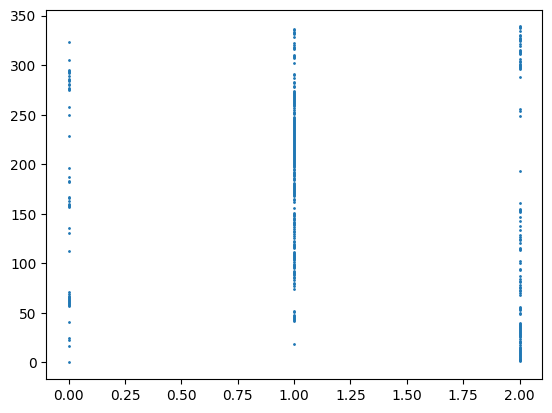

In [445]:
#how many users we have per cluster
plt.plot(cId, range(0,340), 'o', markersize = 1)
cluster1count = np.sum(cId == 0)
cluster2count = np.sum(cId == 1)

In [446]:
#merged.sort_values('clusters_num')
merged.clusters_num.unique()

array([0, 1, 2], dtype=int32)